<a href="https://colab.research.google.com/github/Rohit738767/IPL-Data-Analysis/blob/main/IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

#Analysing IPL Data 
Data Science / Analytics is all about finding valuable insights from the given dataset. In short, Finding answers that could help business. In this tutorial, We will see how to get started with Data Analysis in Python. The Python packages that we use in this notebook are: numpy, pandas, matplotlib, and seaborn

#Loading Libraries
Let us begin our analysis by loading the above mentioned Python Modules/Packages/Libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading input dataset
In order to read the input data, let us first define the directory/path in which the input file is present.
for reading the input csv using pd.read_csv() function.

In [ ]:
#copy the path and store the variable
file_path = '/content/drive/MyDrive/Colab Notebooks/capstone project/matches.csv'

df = pd.read_csv(file_path )

file_path1="/content/drive/MyDrive/Colab Notebooks/capstone project/deliveries.csv"
da= pd.read_csv(file_path1)


In [ ]:
#Columns in dataset
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
#  the dimension of the dataset rows and columns.
df.shape

(756, 18)

In [ ]:
# different types of data/variables in the given dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#How many seasons we’ve got in the dataset?
IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

In [ ]:
#How many seasons we’ve got in the dataset?
df['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [ ]:
len(df['Season'].unique())

12

In [ ]:
 #Which Team had won by maximum Runs?
 df.loc[df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [ ]:
#Which Team had won by maximum wickets?
df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [ ]:
#Which Team had won by minimum wickets?
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
Season                          IPL-2015
city                             Kolkata
date                          09-05-2015
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

#Histogram

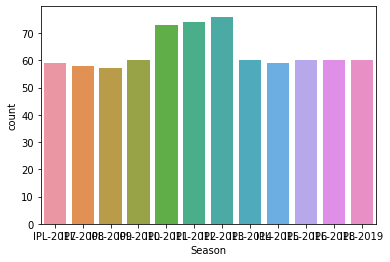

In [ ]:
#Which season had most number of matches?
sns.countplot(x='Season', data=df)
plt.show()

In [ ]:
teams_per_season = df.groupby(['Season','date'])['winner'].value_counts()
teams_per_season

Season    date        winner             
IPL-2008  01-05-2008  Kings XI Punjab        1
                      Rajasthan Royals       1
          01-06-2008  Rajasthan Royals       1
          02-05-2008  Delhi Daredevils       1
          03-05-2008  Kings XI Punjab        1
                                            ..
IPL-2019  29-04-2019  Sunrisers Hyderabad    1
          30-03-2019  Delhi Capitals         1
                      Kings XI Punjab        1
          31-03-2019  Chennai Super Kings    1
                      Sunrisers Hyderabad    1
Name: winner, Length: 752, dtype: int64

In [ ]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
Toss_time = df['toss_decision'].value_counts()
Toss_time

field    463
bat      293
Name: toss_decision, dtype: int64

In [ ]:
team_wins= df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
team_wins_df  

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


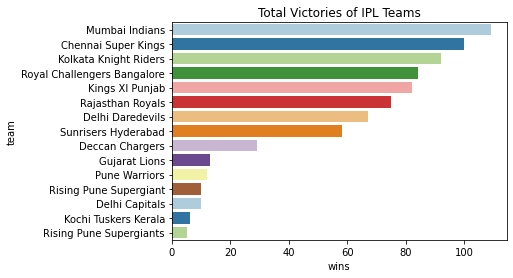

In [ ]:
#The most successful IPL Team
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired')

In [ ]:
mvp_ser = df['player_of_match'].value_counts()

mvp_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1  

NameError: ignored

NameError: ignored

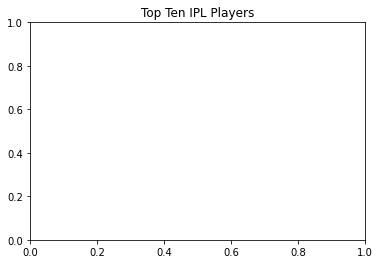

In [ ]:
#Top Ten IPL Players
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

In [ ]:
#df.head()
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df.head(50)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
df.shape

(756, 18)

In [ ]:
f'Total matches till now {len(da.match_id.value_counts())}'

'Total matches till now 756'

In [ ]:
#who bowl maximum over in IPL history
dx=(da.bowler.value_counts()//6)[0:10]
dx

Harbhajan Singh    575
A Mishra           528
PP Chawla          526
R Ashwin           502
SL Malinga         495
DJ Bravo           451
B Kumar            451
P Kumar            439
UT Yadav           434
SP Narine          433
Name: bowler, dtype: int64

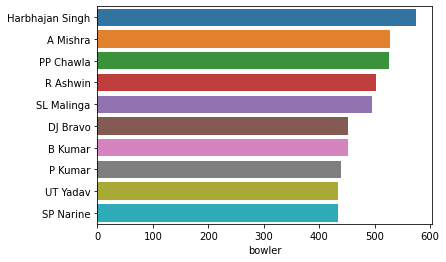

In [ ]:

sns.barplot(y = dx.index, x = dx, orient='h');

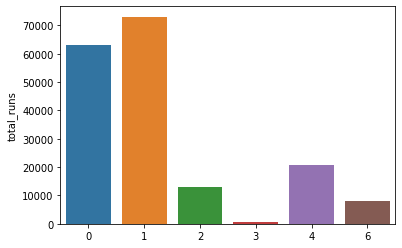

In [ ]:
#Total Runs in IPL score from
dm=da.total_runs.value_counts()[0:6]
sns.barplot(y = dm, x = dm.index);

In [ ]:
#Most wicket Takes in IPL history
ds=da[da["batsman"]==da["player_dismissed"]]
total=ds.bowler.value_counts()[0:10]
total


SL Malinga         181
A Mishra           160
DJ Bravo           159
Harbhajan Singh    157
PP Chawla          153
B Kumar            137
SP Narine          130
R Ashwin           129
UT Yadav           127
R Vinay Kumar      118
Name: bowler, dtype: int64

In [ ]:
da.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
dc=da[da.total_runs==da.total_runs]['batsman']
vm=dc.value_counts()[0:10]

In [ ]:
plt.rcParams['figure.figsize'] = (15,7)

Text(0.5, 0, 'Names of players')

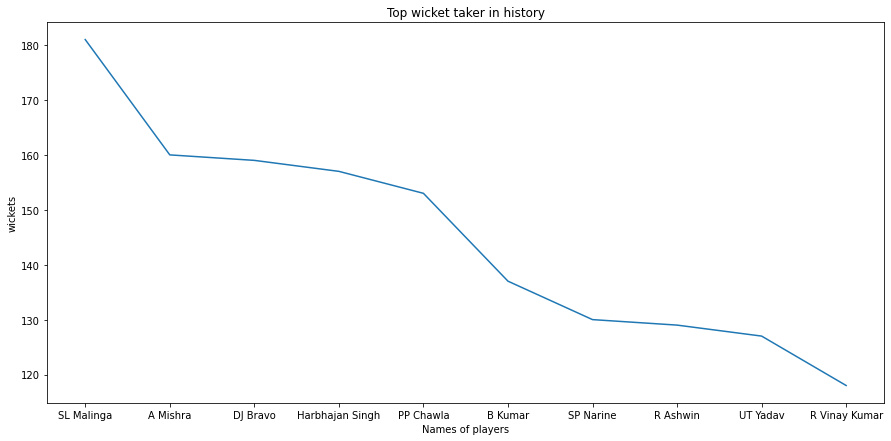

In [ ]:
#Top wicket taker in history
plt.plot(total)

plt.title('Top wicket taker in history')
plt.ylabel('wickets')
plt.xlabel('Names of players')

Text(0.5, 0, 'Name of players')

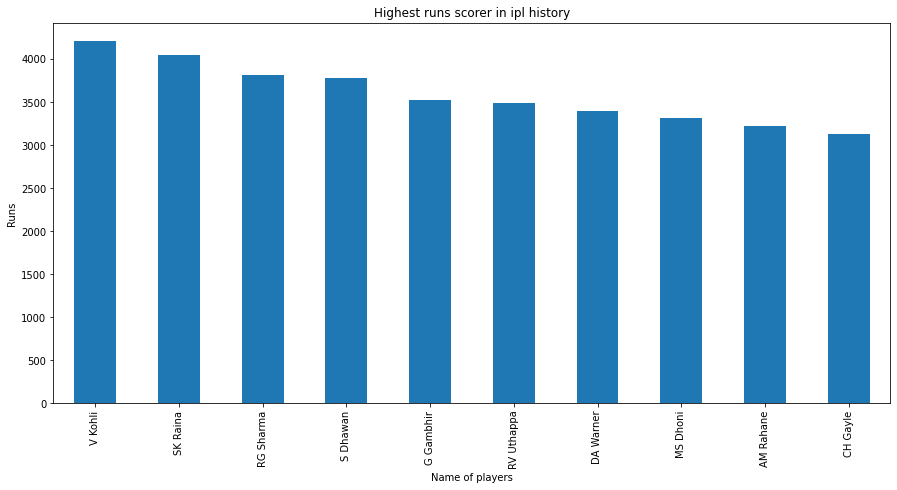

In [ ]:
#Highest runs scorer in ipl history
vm.plot(kind='bar')
 
plt.title('Highest runs scorer in ipl history')
plt.ylabel('Runs')
plt.xlabel('Name of players')

In [ ]:
#dl=da['dismissal_kind'].unique()
dl=df.player_of_match.value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [ ]:
dl=da["caught"==da["dismissal_kind"]]
dl.fielder.value_counts()[0:10]

KD Karthik        109
SK Raina           99
MS Dhoni           98
AB de Villiers     93
RV Uthappa         84
RG Sharma          82
KA Pollard         76
V Kohli            73
PA Patel           69
S Dhawan           68
Name: fielder, dtype: int64

Text(0.5, 0, 'Names of players')

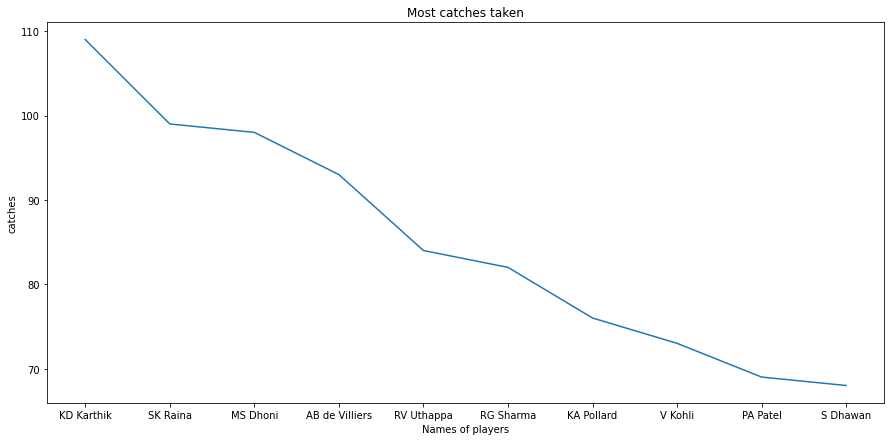

In [ ]:
plt.plot(dl.fielder.value_counts()[0:10])

plt.title('Most catches taken')
plt.ylabel('catches')
plt.xlabel('Names of players')